In [1]:
import numpy as np
from numpy . linalg import svd
from itertools import product

# returns TRG - obtained partition function Z
def Z_TRG (K, Dcut , no_iter ):
    D = 2
    inds = np. arange (D)

    # set up initial tensor network
    T = np. empty ([D, D, D, D])
    for r, u, l, d in product (inds , inds , inds , inds ):
        T[r][u][l][d] = .5*(1 + (2*r -1)*(2*u -1)*(2*l -1)*(2*d -1))* np.exp (2*K*(r+u+l+d -2))

    for n in np. arange ( no_iter ):
        D_new = min (D**2 , Dcut )
        inds_new = np. arange ( D_new )

        # perform SVD decomposition and rewiring on each sublattice
        Ma , Mb = [np. empty ([D**2 , D **2])]*2
        for r, u, l, d in product (inds , inds , inds , inds ):
            Ma[l + D*u][r + D*d] = T[r][u][l][d]
            Mb[l + D*d][r + D*u] = T[r][u][l][d]

        S1 , S2 , S3 , S4 = [np. empty ([D, D, D_new ])]*4

        U, L, V = svd(Ma)
        L = np. sort (L )[:: -1][0: D_new ]
        for x, y, m in product (inds , inds , inds_new ):
            S1[x, y, m] = np. sqrt (L[m ])*U[x + D*y][m]
            S3[x, y, m] = np. sqrt (L[m ])*V[m][x + D*y]

        U, L, V = svd(Mb)
        L = np. sort (L )[:: -1][0: D_new ]
        for x, y, m in product (inds , inds , inds_new ):
            S2[x, y, m] = np. sqrt (L[m ])*U[x + D*y][m]
            S4[x, y, m] = np. sqrt (L[m ])*V[m][x + D*y]

        # decimate extraneous , TRG - generated squares to obtain T'
        T_new = np. empty ([ D_new , D_new , D_new , D_new ])

        for r, u, l, d in product ( inds_new , inds_new , inds_new , inds_new ):
            T_new [r][u][l][d] = 0
            for a, b, g, w in product (inds , inds , inds , inds ):
                T_new [r][u][l][d] += S1[w,a,r]* S2[a,b,u]* S3[b,g,l]* S4[g,w,d]

        D = D_new
        inds = inds_new
        T = T_new

    # after final TRG iteration , trace out remaining tensor to obtain Z
    Z = 0
    for r, u, l, d in product (inds , inds , inds , inds ):
        Z += T[r][u][l][d]

    return Z


A = []
B = np.linspace(0,1.6,56)
for i in B:
    A.append(Z_TRG(i, 6 , 3 ))

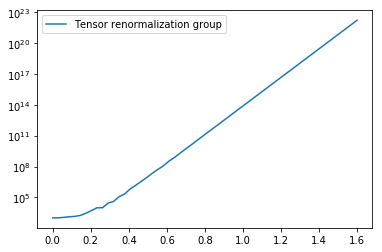

In [5]:
import matplotlib.pyplot as plt
plt.semilogy(B,A,'-',label='Tensor renormalization group');
plt.xlabel('coupling constant')
plt.ylabel('')
plt.legend();